### Task 1- Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print("Whatever")

In [2]:
Loan = pd.read_csv('Loan_details.csv')
Employment = pd.read_csv('Employment_details.csv')
Personal= pd.read_csv('Personal_details.csv')

In [3]:
#Connect different data sources

df = pd.merge(Loan, Employment, on= 'Id')
df = pd.merge(df, Personal, on= 'Id')

In [4]:
df.head()

,Id,LoanAmount applied for (in thoudands),Loan_Amount_Duration,Credit_History,Property_Area,Loan_Status,Self_Employed,Income of applicant,Income of coapplicant,Gender,Marital Status,Family members,Status of education
0,31453,400.0,360.0,1.0,Semiurban,Y,No,3783,3205,Male,Yes,NaN,Graduate
1,21375,438.0,360.0,1.0,Semiurban,Y,NaN,6833,3423,Female,No,0,Not Graduate
2,27992,214.0,360.0,1.0,Urban,Y,NaN,3765,3655,Male,Yes,0,Graduate
3,3326,128.0,360.0,1.0,Urban,Y,No,2474,2584,Male,No,0,Not Graduate
4,22227,116.0,84.0,0.0,Urban,N,No,3000,0,Male,Yes,2,Graduate


In [5]:
df.describe()

,Id,LoanAmount applied for (in thoudands),Loan_Amount_Duration,Credit_History,Income of applicant,Income of coapplicant
count,47856.000000,45660.000000,46367.000000,44409.000000,47856.000000,47856.000000
mean,23928.500000,135.906789,343.222658,0.829539,4854.436748,1664.988486
std,13814.981578,70.156703,61.561339,0.376041,3900.875350,1910.643113
min,1.000000,30.000000,84.000000,0.000000,1064.000000,0.000000
25%,11964.750000,100.000000,360.000000,1.000000,2666.000000,0.000000
50%,23928.500000,125.000000,360.000000,1.000000,3660.000000,1387.000000
75%,35892.250000,160.000000,360.000000,1.000000,5566.000000,2583.000000
max,47856.000000,481.000000,480.000000,1.000000,25515.000000,8610.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47856 entries, 0 to 47855
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Id                                     47856 non-null  int64  
 1   LoanAmount applied for (in thoudands)  45660 non-null  float64
 2   Loan_Amount_Duration                   46367 non-null  float64
 3   Credit_History                         44409 non-null  float64
 4   Property_Area                          47856 non-null  object 
 5   Loan_Status                            47856 non-null  object 
 6   Self_Employed                          45311 non-null  object 
 7   Income of applicant                    47856 non-null  int64  
 8   Income of coapplicant                  47856 non-null  int64  
 9   Gender                                 46676 non-null  object 
 10  Marital Status                         47856 non-null  object 
 11  Fa

In [7]:
# Changing Family members column to from object to float
df['Family members'] = pd.to_numeric(df['Family members'], errors= 'coerce')
df.dtypes['Family members']

dtype('float64')

In [8]:
df.dtypes

Id                                         int64
LoanAmount applied for (in thoudands)    float64
Loan_Amount_Duration                     float64
Credit_History                           float64
Property_Area                             object
Loan_Status                               object
Self_Employed                             object
Income of applicant                        int64
Income of coapplicant                      int64
Gender                                    object
Marital Status                            object
Family members                           float64
Status of education                       object
dtype: object

In [9]:
#Check if missing values and outliers are there
df.isnull().sum()

Id                                          0
LoanAmount applied for (in thoudands)    2196
Loan_Amount_Duration                     1489
Credit_History                           3447
Property_Area                               0
Loan_Status                                 0
Self_Employed                            2545
Income of applicant                         0
Income of coapplicant                       0
Gender                                   1180
Marital Status                              0
Family members                           4890
Status of education                         0
dtype: int64

#### Finding outliers in Numerical variable

In [10]:
#checking the outlier with the Z-score
from scipy import stats

z_scores = stats.zscore(df['LoanAmount applied for (in thoudands)'])
threshold= 3
outliers = df['LoanAmount applied for (in thoudands)'][abs(z_scores)> threshold]
print(outliers)

z_scores = stats.zscore(df['Loan_Amount_Duration'])
threshold= 3
outliers = df['Loan_Amount_Duration'][abs(z_scores)> threshold]
print(outliers)

z_scores = stats.zscore(df['Family members'])
threshold= 3
outliers = df['Family members'][abs(z_scores)> threshold]
print(outliers)

Series([], Name: LoanAmount applied for (in thoudands), dtype: float64)
Series([], Name: Loan_Amount_Duration, dtype: float64)
Series([], Name: Family members, dtype: float64)


<AxesSubplot:xlabel='Family members'>

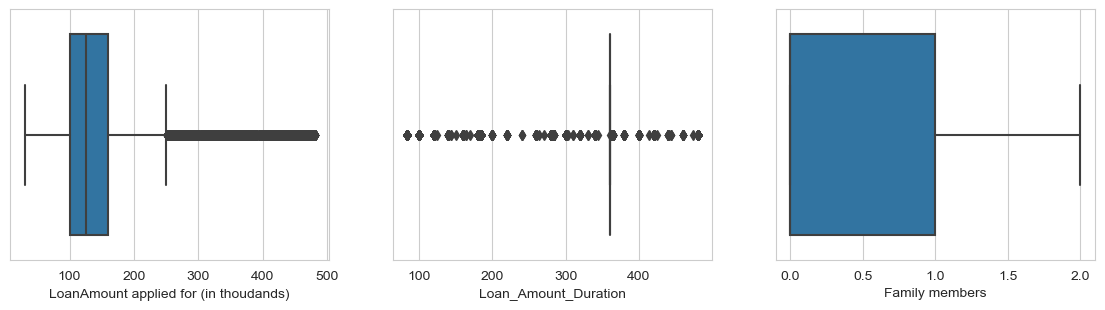

In [11]:
#For finding the outliers in numeric column using Matplotlib
plt.figure(figsize=(14,15))
sns.set_style(style='whitegrid')

    # Plot 1 
plt.subplot(4,3,1)
sns.boxplot(x='LoanAmount applied for (in thoudands)',data=df)

    # Plot 2
plt.subplot(4,3,2)
sns.boxplot(x='Loan_Amount_Duration',data=df)

    # Plot 3 
plt.subplot(4,3,3)
sns.boxplot(x='Family members',data=df)


#### Imputing missing values in Numerical variable

In [12]:
df.dropna(subset=['Loan_Amount_Duration', 'Family members'], inplace= True)

In [13]:
df['LoanAmount applied for (in thoudands)'].fillna(df['LoanAmount applied for (in thoudands)'].mean(), inplace=True)

In [14]:
df.isnull().sum()

Id                                          0
LoanAmount applied for (in thoudands)       0
Loan_Amount_Duration                        0
Credit_History                           2868
Property_Area                               0
Loan_Status                                 0
Self_Employed                            2036
Income of applicant                         0
Income of coapplicant                       0
Gender                                    983
Marital Status                              0
Family members                              0
Status of education                         0
dtype: int64

#### Finding outliers in categorical variable

In [15]:
df['Credit_History'].value_counts()

1.0    32463
0.0     6409
Name: Credit_History, dtype: int64

In [16]:
df['Self_Employed'].value_counts()

No     34980
Yes     4724
Name: Self_Employed, dtype: int64

In [17]:
df['Gender'].value_counts()

Male      33735
Female     7022
Name: Gender, dtype: int64

In [18]:
df['Self_Employed'].fillna('No', inplace = True)
df['Gender'].fillna('Male', inplace = True)
df['Credit_History'].fillna('1.0', inplace = True)

In [19]:
df.isnull().sum()

Id                                       0
LoanAmount applied for (in thoudands)    0
Loan_Amount_Duration                     0
Credit_History                           0
Property_Area                            0
Loan_Status                              0
Self_Employed                            0
Income of applicant                      0
Income of coapplicant                    0
Gender                                   0
Marital Status                           0
Family members                           0
Status of education                      0
dtype: int64

In [20]:
df.duplicated()

1        False
2        False
3        False
4        False
5        False
         ...  
47849    False
47850    False
47852    False
47853    False
47854    False
Length: 41740, dtype: bool

#### Other Queries